# Using an SVM to Classify the Iris Dataset

## Our Objective
In this tutorial, we will load the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which contains data about 150 Iris flowers. Then, we will use an support vector machine (SVM) to build a model that can classify these flowers correctly into one of three classes. The dataset contains four features, which are: Petal Length, Petal Width, Sepal Length, and Sepal Width. The flowers should be classified into: Iris _setosa_, Iris _virginica_ and Iris _versicolor_.

## Load the Data
<p>First, we will import the load_iris function from the scikit-learn library. This function should return a 150 x 4 matrix of the features, and the corresponding 150 classifications of the data. We can access the features through `irisData.data`, and similarly, the target variable through `irisData.target`. To confirm that the data was retrieved successfully, we print the number of points, which is equivalent to size of the array containing the target variable. </p>
<p>Then, we normalize the data.</p>

In [182]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# load the dataset
irisData = load_iris()
print("Number of Points: ", irisData.target.size)

# Normalize the data using StandardScalar
scaler = StandardScaler()
irisData.data = scaler.fit_transform(irisData.data, irisData.target)
print("Normalization was successful!")

Number of Points:  150
Normalization was successful!


## Explore the Data


### The Output
Run the code below to print the target variable. You will find that the three classes of Iris flowers are represented by 0, 1, and 2 respectively. Therefore, our classifier would return one of those numbers as an answer.

In [183]:
print(irisData.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Plotting the Classes against the Features
<p>Let's begin examining our features and how they relate to the classes. Running the code below will display 3 graphs, each with two features of the four available. The points displayed on the graphs represent our dataset. Each class has a different color. Feel free to complete the code to print all 6 possible 2D graphs.</p>

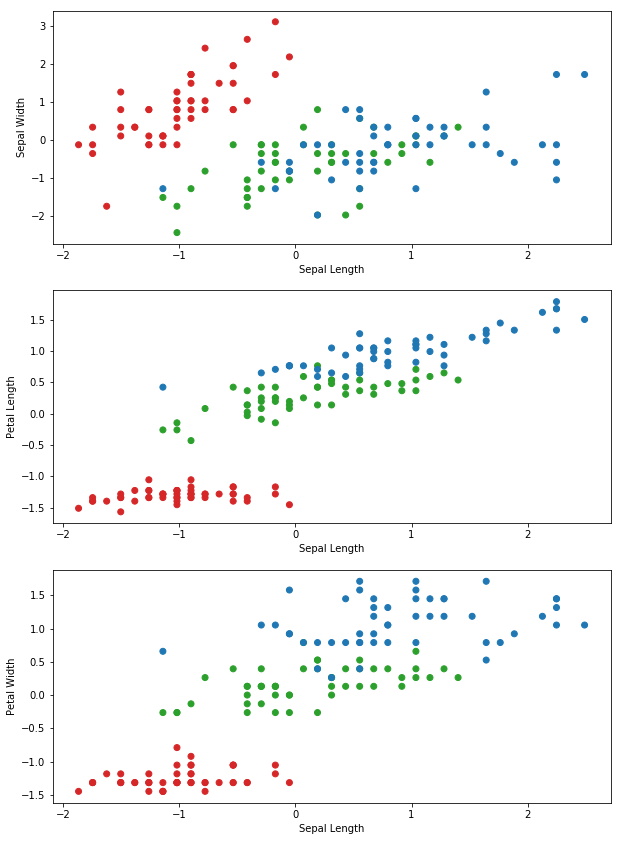

In [184]:
import matplotlib.pyplot as plt
import numpy as np
#create an array of colors
plotColors = np.array(irisData.target, dtype=object)
plotColors[plotColors == 0] = 'tab:red'
plotColors[plotColors == 1] = 'tab:green'
plotColors[plotColors == 2] = 'tab:blue'

fig = plt.figure(figsize=(10,30))
subplots = fig.add_subplot(6,1,1)
subplots.set_xlabel('Sepal Length')
subplots.set_ylabel('Sepal Width')

subplots.scatter(irisData.data[:,0],irisData.data[:,1], c=plotColors)

subplots = fig.add_subplot(6,1,2)
subplots.set_xlabel('Sepal Length')
subplots.set_ylabel('Petal Length')

subplots.scatter(irisData.data[:,0],irisData.data[:,2], c=plotColors)

subplots = fig.add_subplot(6,1,3)
subplots.set_xlabel('Sepal Length')
subplots.set_ylabel('Petal Width')

subplots.scatter(irisData.data[:,0],irisData.data[:,3], c=plotColors)

### Making Some Observations
From the graphs above, you can tell that class 0 (shown in red) is more distinguishable from the other two classes. Each of Petal Width and Petal Length is in fact enough to distinguish class 0 from the rest of the flowers on its own. On the other hand, however, the boundaries between the two other classes seem to be slightly blurred.
<br/>It is possible that in 3D or 4D the boundary would be more well-defined; however, from the plots we have, we could say that our classifier would have to adapt a good soft-margin in order to classify the data properly.

## Splitting the Data
The next step is to split the data into training and testing sets. Because our dataset is relatively small, 20% of the data only would be used for testing, while 80% would go to training. This is indicated by the parameter `test_size` that we pass to `train_test_split`. We also pass the features and the target variable arrays, which will be split, and finally, the `random_state` parameter can be assigned any number. A print statement confirms that the splitting was done successfully.

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(irisData.data, irisData.target, test_size=0.2, random_state=0)
print("Splitting was completed successfully")

Splitting was completed successfully


## Hyperparameter Optimization

We will use `LinearSVC` to fit a model for our data. `LinearSVC` is short for linear support vector classfier, an SVM without a kernel. For better perfomance, we will set `loss='hinge'`. However, `LinearSVC` takes a hyperparameter `C`, which describes the degree of tolerance for violations of the margin. Models with low tolerance might often fail to generalize properly. On the other hand, models with a very high tolerance might not capture the true division of the classes. <br/>
In order to find the best hyperparameter `C`, we will create a function called `svc_param_selection`. This function takes as arguments a list of possible values for `C`, the training data, and the training target values. It then uses `ShuffleSplit` to create 10 cross-validation sets. Then, these sets, along with our classifier and possible values of `C`, are passed to the grid search. After running the grid search, the best score and best parameter are printed, and the best classifier is returned.

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
def svc_param_selection(c, X, y):
    print("Undergoing Grid Search")
    # split the data into cross validation sets
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    params = {'C': c}
    # pass the linear estimator
    grid_search = GridSearchCV(estimator=LinearSVC(loss='hinge', random_state=0), param_grid = params, cv=cv_sets)
    # fit the data to compute the optimal model
    grid_search.fit(X, y) 
    # return the best estimator
    print(grid_search.best_score_)
    print(grid_search.best_params_)
    return grid_search.best_estimator_

## Obtaining A Classifier
Run the code below to execute `svc_param_selection` and retrieve a linear classifier.

In [187]:
possible_C_values = [2**-5, 2**-1, 2, 2**2, 2**3, 2**4, 2**5, 2**6,2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14]
linearClassifier = svc_param_selection(possible_C_values, X_train, y_train)

Undergoing Grid Search
0.9333333333333333
{'C': 512}


## Finetune the Hyperparameter C
Is the value we found the best value for `C`? We could check the values around it to see if slightly increasing or decreasing `C` could result in better performance for our model. Run the code below to check the range around our `C`.

In [189]:
linearClassifier = svc_param_selection(np.arange(linearClassifier.C - 150, linearClassifier.C + 150), X_train, y_train)

Undergoing Grid Search
0.9541666666666667
{'C': 427}


## Run the Model to Predict the Test Data
Finally, we run the model on the test data, and see the results.

In [190]:
print('Predictions: ', linearClassifier.predict(X_test))
print('Real Values: ', y_test)
print('Score On Test Data: ', linearClassifier.score(X_test,y_test))

Predictions:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Real Values:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Score On Test Data:  1.0


## Using a Polynomial Kernel

Let's now try repeating the same steps followed above, but this time with a polynomial kernel.

In [195]:
from sklearn.svm import SVC
def svc_param_selection(c, degree, coef, X, y):
    print("Undergoing Grid Search")
    # split the data into cross validation sets
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    params = {'C': c, 'degree': degree, 'coef0': coef}
    # pass the linear estimator
    grid_search = GridSearchCV(estimator=SVC(kernel='poly', gamma='auto', random_state=0), param_grid = params, cv=cv_sets)
    # fit the data to compute the optimal model
    grid_search.fit(X, y) 
    # return the best estimator
    print(grid_search.best_score_)
    print(grid_search.best_params_)
    return grid_search.best_estimator_

In [ ]:
polynomialClassifier = svc_param_selection(possible_C_values, \
                                           [2, 3, 4, 5, 6, 7, 8, 9, 10], \
                                           [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], \
                                           X_train, y_train)

Undergoing Grid Search


In [194]:
print('Predictions: ', polynomialClassifier.predict(X_test))
print('Real Values: ', y_test)
print('Score On Test Data: ', polynomialClassifier.score(X_test,y_test))

Predictions:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Real Values:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Score On Test Data:  1.0


## The Difference Between a Polynomial Kernel and LinearSVC


If the datapoints are linearly-separable, LinearSVC is a good choice. The term _linearly-separable_ means that the data could be divided into the present classes using straight lines, planes, or their corresponding shapes in higher dimensions. On the other hand, if the data is not linearly-separable, a polynomial kernel would perform better. In our test runs above, both models performed equally well on the test data.